This code is used for evaluating the models located in './Models/'.

This is useful if you don't want to train the models again.

If you only want to run specific models, then ignore blocks that don't apply.

e.g. run blocks from 'Deep Learning starts' until 'Deep Learning end' if you just want to see the evaluation for the CNNs.

In [21]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from collections import Counter
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from joblib import load
from sklearn.metrics import accuracy_score, classification_report

Deep learning start:

In [2]:
# Download the test set if you haven't already
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset_test = datasets.EMNIST(root='./data', split='letters', train=False, download=True, transform=transform)

batch_size = 64
test_loader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

100%|██████████| 562M/562M [00:36<00:00, 15.4MB/s]


Extracting ./data/EMNIST/raw/gzip.zip to ./data/EMNIST/raw


In [7]:
'''
Following block evaluates the CNNs

Note that you can just comment/uncomment out the lines to choose which model to evaluate.

'''
num_classes = 26

# Initialise the model
model = models.efficientnet_v2_s(num_classes=num_classes, weights=None)
model.load_state_dict(torch.load('./Models/efficientnetv2_s.pth'))

# # Initialise the model
# model = models.efficientnet_b4(num_classes=num_classes, weights=None)
# model.load_state_dict(torch.load('./Models/efficientnet_b4'))

<ipython-input-7-4cac9fcb59bb>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./Models/efficientnetv2_s.pth'))


<All keys matched successfully>

In [11]:
#### Evaluates on the test set ####

torch.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(f'Using device: {device}')

lr = 0.005
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#keep track of metrics
total_val_loss = []
total_val_acc = []
all_labels = []
all_predictions = []
best_acc = 0

model.eval()
val_loss = []
correct = 0
total = 0

for data in test_loader:
    inputs, labels = data

    inputs = inputs.to(device)
    labels = (labels - 1).to(device)

    #pass through model classifier
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    val_loss += [loss.cpu().item()]
    predicted = torch.argmax(outputs, axis = 1)
    correct += torch.sum(predicted == labels).cpu().item()
    total += len(labels)

    all_labels.extend(labels.cpu().numpy())
    all_predictions.extend(predicted.cpu().numpy())

mean_val_loss = np.mean(val_loss)
val_accuracy = correct/total
total_val_loss += [mean_val_loss]
total_val_acc += [val_accuracy]

print(f'Model accuracy {val_accuracy}')

Using device: cuda:0
Model accuracy 0.9508653846153846


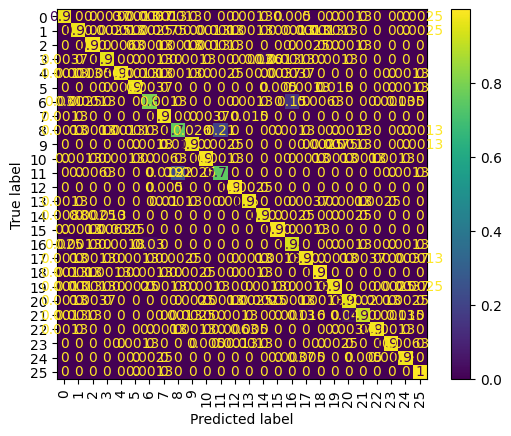

In [18]:
# bit hard to see since there are 26 classes
ConfusionMatrixDisplay.from_predictions(all_labels,
                                        all_predictions,
                                        normalize = 'true',
                                        xticks_rotation='vertical')

Deep learning End

Non-DL methods Start

In [19]:
# Obtain a test/split for EMNIST
dataset_test = datasets.EMNIST(root='./data', split='letters', train=False, download=True)

# Need to flatten data into an array
x_test = dataset_test.data.numpy()
y_test = dataset_test.targets.numpy()

# Normalise
x_test = x_test / 255.0

# Flatten
x_test = x_test.reshape(x_test.shape[0], -1)

In [22]:
# load models and evaluate.
# just comment/uncomment whichever model you want to evaluate.


#Random Forest Model#
rf_classifier = load('./Models/rf_classifier.joblib')
y_pred_rf = rf_classifier.predict(x_test)
# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classifier Report:")
print(classification_report_rf)


# SVM #
# svm_classifier = load('./Models/svm_classifier.joblib')
# y_pred_svm = svm_classifier.predict(x_test)
# # Evaluate
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# classification_report_svm = classification_report(y_test, y_pred_svm)
# print(f"SVM Classifier Accuracy: {accuracy_svm:.4f}")
# print("Random Forest Classifier Report:")
# print(classification_report_svm)


Random Forest Classifier Accuracy: 0.8855
Random Forest Classifier Report:
              precision    recall  f1-score   support

           1       0.81      0.88      0.84       800
           2       0.91      0.92      0.92       800
           3       0.93      0.92      0.93       800
           4       0.90      0.88      0.89       800
           5       0.90      0.92      0.91       800
           6       0.92      0.90      0.91       800
           7       0.84      0.70      0.76       800
           8       0.89      0.87      0.88       800
           9       0.71      0.73      0.72       800
          10       0.88      0.89      0.89       800
          11       0.88      0.90      0.89       800
          12       0.72      0.71      0.72       800
          13       0.94      0.95      0.95       800
          14       0.87      0.90      0.89       800
          15       0.89      0.96      0.92       800
          16       0.92      0.95      0.94       800
      